# Signal frontier analysis
by: Adam Tschannen and Evan Giakoumakis

# Abstract
The finance industry's competitive advantage is being able to access more information faster and then being able to act upon it. The advances in computing power have not only allowed for the ability to process and use the mass amounts of data but also apply new methods on analyzation from different industries. One such method which was originally used in electrical engineering is the signal frontier methods. This method is used in engineering to analyze electrical signals. However, the advances in computing power has given the finance industry the ability to apply these techniques to time series data. Since signal processing measures a numeric variable against an independent variable like time it can easily be applied to time series data. This is because time series data is structured so that we have an observation of something at specific points in time. Since the stocks go up in down and have a price a specific time, signal frontier analysis can pick up and find signals that tell you to buy or sell at a more precise and rapid paces the once previously possible.

# Introduction

After examining a plethora of financial data, it slowly becomes evident that there is much chaos, and little order. Often times logically sound and profound patterns surface, and then disappear rapidly as things change from day to day. That raises the question of how can we separate the signal from the noise, what has value from what does not? Attempting to answer this tough question, or at least shine some light on the processes and guidelines employed is the goal of this analysis.

Before we jump into hedge fund portfolios and high frequency trading we will understand the basics of what a signal is. A signal was developed in the electrical engineering field to explain a behavior. For instance, it measures voltage or can measure and differentiae sound into voltage or voltage into sound. A signal at its most basic form measures a numeric variable in relation to an independent variable. You can think of the numeric variable as a stock's price and the independent variable as time. This is why signal frontier analysis is so transferable to the finance industry because from a far, and at its core, it acts the same way as a time series analysis. 

Within the financial industry there are two schools of thought for trading stocks. One is fundamental trading which is when we look at all data to analyze how a stock will do except for the trading patterns. The opposite of this theory is technical training which only looks at the trading patterns. These two philosophies’ can be categorized as long-term trading and short-term trading where short term can be anywhere from a second to a year where long term can extend to many years. The technique of signal frontier analysis applies explicitly to technical trading. Like we said before, signal analysis measures a numeric variable against an independent variable like time which is exactly what time series does; it measures stock price of set time periods. This only takes into the performance on that stock without taking into consideration of other factors. 


# Method Selection

The method selected to be analyzed in this notebook is Signal Frontier. Signal Frontier Analysis is an econometric technique used to analyze a basket of securities and find the optimal holding and look-back periods associated with it. 

In the United States, a security is a tradable financial asset of any kind. It can be widely categorized into two groups: equities and debts. Securities represent an investment and a means by which the issuer (municipalities and companies) can raise new capital. Depending on the institution this can be preferred to financing using a bank loan.

Holding refers to an investing strategy practiced mostly by passive investors. An investor using this strategy, selects stocks, and usually ignores the day-to-day or even month-to-month fluctuations in the stock's price. The investor lets his or her money increase with the growth of the overall market.

A look-back period is a condition that bases the purchase price of a stock not on its price at the time of purchase but, rather, on the price either at the beginning of the offering period or at the end of the purchase period. 

The method for calculating the risk-adjusted return is the Sharpe Ratio. The Sharpe Ratio indicates the average return minus the risk-free return divided by the standard deviation of return on an investment. The higher the value the greater the returns. 

Back testing is commonly used to test various algorithms and portfolios as well as compare a portfolio’s comprehensive risk-return characteristics. Portfolio managers normally use it, in order to help them determine whether additional allocation of assets can improve their returns.


In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
pd.core.common.is_list_like = pd.api.types.is_list_like
start_dt=datetime.datetime(2014,1,1)
end_dt=datetime.datetime(2018,1,1)
from pandas_datareader import data as web
stock='TSLA'
px=pd.DataFrame({'TSLA':web.DataReader(stock,'iex', start_dt, end_dt)['close']})
names=['MS', 'GE', 'FB']
for stock in names:
    while True:
        try:
            px[stock]=web.DataReader(stock,'iex', start_dt, end_dt)['close']
            break
        except:
            print('Unable to read stock: {0}'.format(stock))
            print('trying again')
px.index=pd.to_datetime(px.index)

5y
5y
5y
5y


First we define the time frame we want to analyze. Next import the stocks we want to analyze. In this case we are going to analyze Microsoft, General Electric, Facebook, and Tesla starting January 1, 2014 and ending May 1, 2018. Finally, we fetched this data from Yahoo finance. 

In [2]:
%matplotlib inline

In [3]:
# # fill missing stock values using forward fill method
px_append = px.asfreq('B').fillna(method='pad')

Now that we have our data we used the 'pad' method to fill the missing data values. With this technique, if there is a missing value it takes the previous value and appends on the next missing value. Because there are so many values this techniques offers relatively low risk and quick implementation. Also, with stock market data, prices rarely jump or fall a significant amount then correct immediately. Because of this logic, we chose to replace missing data using the 'pad' method uses the last known value.



In [4]:
px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2014-01-02 to 2017-12-29
Data columns (total 4 columns):
TSLA    1007 non-null float64
MS      1007 non-null float64
GE      1007 non-null float64
FB      1007 non-null float64
dtypes: float64(4)
memory usage: 79.3 KB


In [5]:
# show collected stock dataset
px_append.info()
px_append.head()
px_append.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1042 entries, 2014-01-02 to 2017-12-29
Freq: B
Data columns (total 4 columns):
TSLA    1042 non-null float64
MS      1042 non-null float64
GE      1042 non-null float64
FB      1042 non-null float64
dtypes: float64(4)
memory usage: 40.7 KB


,TSLA,MS,GE,FB
date,,,,
2017-12-25,325.20,52.2392,17.2373,177.20
2017-12-26,317.29,51.9915,17.2869,175.99
2017-12-27,311.64,52.0906,17.2373,177.62
2017-12-28,315.36,52.1698,17.2175,177.92
2017-12-29,311.35,51.9915,17.3068,176.46


As we can see, our original data set had 1007 observations where as our imputed data set has no missing data with 1042 records. Of note, the stock market is open 252 days a year which adds up to 1008 days of trading over 4 years. This would show the non imputed data is correct for our analysis. However with the 9 holidays and three half days of closed non trading, we were able to take the last know value, impute it, and create a complete data set. This method allows for little bias and give a complete data set which allows us to run a time series analysis.



In [8]:
plt.close('all')

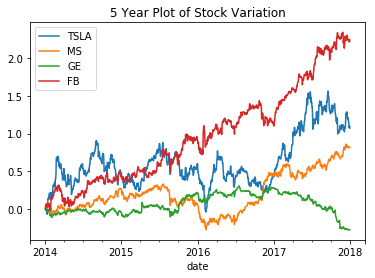

In [9]:
# fill missing values using forward fill method
px = px.asfreq('B').fillna(method='pad') 
# calculate percent change
rets = px.pct_change() 
# calculate the cumulative product of elements
disp = ((1 + rets).cumprod() - 1) 
# plot results
disp.plot(title='5 Year Plot of Stock Variation')
#disp.xlabel('Date')
#plt.ylabel('Percent Change')
#plt.title('5 Year Plot of Stock Variation')


In the plot above we can see the performance of our stocks. At first glance we can see a positive trend for Facebook, a relatively change of 0 for TSLA except from 2017 when the change starts to increase, a relative 0 change for GE except for a decline starting around 2017, and a wave of ups and downs for MS with a trend moving upwards starting in 2016.

In [10]:
# Function to compute momentum
def calc_mom(price, lookback, lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis=1, ascending=False)
    demeaned = ranks.subtract(ranks.mean(axis=1), axis=0)
    return demeaned.divide(demeaned.std(axis=1), axis=0)

Next we compute the momentum over a specific period and rank the momentum in descending order and standardize.

In [11]:
# Function to assist us in computing portfolio for a particular period as well as holding period 
# returns total Sharpe ratio
compound = lambda x : (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()

def strat_sr(prices, lb, hold):
    # Compute portfolio weights
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)

    daily_rets = prices.pct_change()

    # Compute portfolio returns
    port = port.shift(1).resample(freq, how='first')
    returns = daily_rets.resample(freq, how=compound)
    port_rets = (port * returns).sum(axis=1)

    return daily_sr(port_rets) * np.sqrt(252 / hold)

In [12]:
sr1 = strat_sr(px, 70, 30)
print("Sharpe Ratio for holding period 30 days and weight 70: ",sr1)
sr2 = strat_sr(px, 365, 30)
print("Sharpe Ratio for holding period 30 days and weight 365: ",sr2)
sr3 = strat_sr(px, 700, 30)
print("Sharpe Ratio for holding period 30 days and weight 700: ",sr3)


Sharpe Ratio for holding period 30 days and weight 70:  -0.140367344801
Sharpe Ratio for holding period 30 days and weight 365:  0.0201651932634
Sharpe Ratio for holding period 30 days and weight 700:  0.323914610636


/Users/atschannen/anaconda3/envs/Adam/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  
/Users/atschannen/anaconda3/envs/Adam/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  from ipykernel import kernelapp as app


Now that we have the momentum computed, ranked, and standardized we compute a portfolio for a particular weight as well as a holding period. The sharp ratio helps us define a strategy for trading. The px represents are portfolio of stocks, the first number is how far back we establish our weights and the final variable shows how long to hold the stocks for this portfolio. 

Please note, the higher a sharp ratio is the better returns you will see on that specific portfolio. As we can see, the weights we assign can have dramatic effect while keeping the holding period static. A range of 70-700 in weights can either show a loss of 14% or a gain of 32%. In general, stock prices will tend to act more similarly to their most recent price than they would a year ago. This means that long look back periods might not be the best strategy for short holding periods. On the other side of this, short look back periods might not be the best for long holding periods so one must carefully select their strategy.


In [13]:
# Evaluate strat_sr function over a grid of variables and storing them in a dictianary
# Lastly inserting results in a DataFrame
from collections import defaultdict

lookbacks = range(20, 90, 5)
holdings = range(20, 90, 5)
dd = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px, lb, hold)

ddf = DataFrame(dd)
ddf.index.name = 'Holding Period'
ddf.columns.name = 'Lookback Period'

print(ddf)

/Users/atschannen/anaconda3/envs/Adam/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  
/Users/atschannen/anaconda3/envs/Adam/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  from ipykernel import kernelapp as app


Lookback Period        20        25        30        35        40        45  \
Holding Period                                                                
20              -0.135254 -0.382736 -0.495807 -0.502519 -0.194650 -0.240322   
25               0.389180  0.349299  0.790178  0.206502  0.067983  0.091030   
30              -0.228311 -0.068138  0.067756 -0.049027  0.239034 -0.119967   
35               0.084200 -0.123204 -0.237329  0.362231  0.312570 -0.179491   
40              -0.258184 -0.078397 -0.321043 -0.482147 -0.191463 -0.452880   
45              -0.001159 -0.330961 -0.448093 -0.726818 -0.675571 -0.222178   
50               0.186726  0.001019  0.159389 -0.279918 -0.341265 -0.334690   
55              -0.044649 -0.225531 -0.227806 -0.359216 -0.294932 -0.214350   
60              -0.043311  0.124197  0.056568 -0.006743  0.003954 -0.249225   
65              -0.524536 -0.364541 -0.430239 -0.456708 -0.726229 -0.567441   
70              -0.557676 -0.467963 -0.715618 -0.470

Above we created a grid search to find optimal holding periods and look back periods. We will next visualize our findings so they are easily usable.

# Results 

In [14]:
# To visualize our results the heatmap function below uses matplotlib to produce a heatmap 
import matplotlib.pyplot as plt

def heatmap(df, cmap=plt.cm.gray_r):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

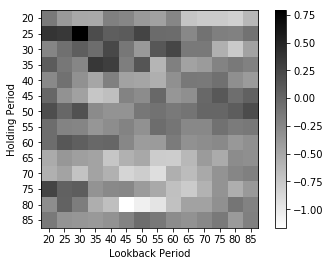

In [15]:
# Display heatmap of backtest results
heatmap(ddf)
plt.show()

In our heat map above we visualize our results from the methods of using the signal frontier analysis. The heat map shows the best results, signaled as black, and worst returns, signaled as white. We can see in the upper left quadrant, the best combination is a lookback period of 30 and a holding period of 25. These parameters will give us a return of about 35%. On the other side of the spectrum, the worst combination is holding period of 80 with a lookback period of 45 which yields a -95% return.

In [17]:
# max for each row
maxForRow = ddf.max(axis=0)
globalMax = maxForRow.max()
print("Max Sharpe Ratio is: %f" % globalMax)
ddf[ddf.values==globalMax]

Max Sharpe Ratio is: 0.790178


Lookback Period,20,25,30,35,40,45,50,55,60,65,70,75,80,85
Holding Period,,,,,,,,,,,,,,
25,0.38918,0.349299,0.790178,0.206502,0.067983,0.09103,0.265792,-0.032107,-0.040272,-0.252065,-0.095353,-0.188435,-0.201547,-0.090584


In [19]:
# min for each row
minForRow = ddf.min(axis=0)
globalMin = minForRow.min()
print("Min Sharpe Ratio is: %f" % globalMin)
ddf[ddf.values==globalMin]

Min Sharpe Ratio is: -1.167340


Lookback Period,20,25,30,35,40,45,50,55,60,65,70,75,80,85
Holding Period,,,,,,,,,,,,,,
80,-0.293358,0.033102,-0.165982,-0.544711,-0.673185,-1.16734,-1.045403,-0.954259,-0.689005,-0.449183,-0.451382,-0.314981,-0.110288,-0.207263


As observed from the heatmap above, programmatically searching for maximum and minimum yields the exact same results. 
A holding period of 25 with lookback period of 30 offers the maximum value with a return of about 35%, whereas a holding period of 80 with a lookback period of 45 offers the minimum value with a return of -95%.


# Future work/Discussion/Conclusion

The Signal analysis was originally developed in the electrical engineering field. Electrical engineers used it to measure electrical behavior by measuring a variable against an independent variable. The signal was used to measure and differentiate between the signal and noise. With the advancements in computing power, this same technique is  applied to the finance industry as signal frontier time series analysis.

The signal frontier analysis is used in the technical trading arena where only the performance of the stock is measured. We are able to apply weights and holding periods as signals to tell the trader when to buy, sell or hold a stock. Traders are trying to predict a stock price solely based on the historic prices of said stock. These techniques are used by hedge funds which can trade large volumes of shares quickly generating large returns even on small magins.

Although there are many financial benefits while using the signal frontier analysis technique there are also dramatic down falls. As more and more hedge funds and traders adopt this school of thought, technical trading, these results can become amplified. We saw downside of this in 2016 with mass amounts of algorithms were signaled all at once to off load stock. The signals from all of the information can loop on itself and if lots of firms are using the same type of algorithms at the same time then the fluctuation can become greater. This is what happened in 2016. With the mass offloading of shares and no one to buy them, stocks lost a dramatic amount of their value. This lead to the stock price quickly falling and dramatic loss of money.


# Refrences 

1. https://sites.tufts.edu/eeseniordesignhandbook/2015/signal-processing-in-finance/
2. https://www.washingtonpost.com/news/posteverything/wp/2018/02/07/machines-caused-this-weeks-market-crash-people-caused-the-freak-out-that-followed-it/?noredirect=on&utm_term=.da9d36a8b8fb
3. http://www.efficientfrontier.com/ef/999/noise.htm